# Cleaning Player data

In this notebook we'll clean the data collected on the players in the nba

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Merging all the player data into one dataframe

In [3]:
player_data_dir = "../data/raw/players_data"


player_data_frames = []


for filename in os.listdir(player_data_dir):
    if filename.endswith(".csv"):
        file_path = os.path.join(player_data_dir, filename)
        
        player_name = filename.split("_")[0]  
        df = pd.read_csv(file_path)
        # creating separate column for player name in the dataframe
        df['player_name'] = player_name
        player_data_frames.append(df)
player_data_combined = pd.concat(player_data_frames, ignore_index=True)


player_data_combined

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,player_name
0,920,1985-86,0,1610612747,LAL,22.0,82,1.0,1542.0,209,...,160.0,221.0,381.0,54,49.0,49.0,99.0,229,521,A.C. Green
1,920,1986-87,0,1610612747,LAL,23.0,79,72.0,2240.0,316,...,210.0,405.0,615.0,84,70.0,80.0,102.0,171,852,A.C. Green
2,920,1987-88,0,1610612747,LAL,24.0,82,64.0,2636.0,322,...,245.0,465.0,710.0,93,87.0,45.0,120.0,204,937,A.C. Green
3,920,1988-89,0,1610612747,LAL,25.0,82,82.0,2510.0,401,...,258.0,481.0,739.0,103,94.0,55.0,119.0,172,1088,A.C. Green
4,920,1989-90,0,1610612747,LAL,26.0,82,82.0,2709.0,385,...,262.0,450.0,712.0,90,66.0,50.0,116.0,207,1061,A.C. Green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29870,980,2008-09,0,1610612739,CLE,34.0,65,65.0,1765.0,342,...,157.0,333.0,490.0,64,28.0,84.0,90.0,183,838,Zydrunas Ilgauskas
29871,980,2009-10,0,1610612739,CLE,35.0,64,6.0,1339.0,194,...,114.0,231.0,345.0,48,14.0,50.0,63.0,183,474,Zydrunas Ilgauskas
29872,980,2010-11,0,1610612748,MIA,36.0,72,51.0,1145.0,162,...,108.0,179.0,287.0,26,23.0,58.0,52.0,185,360,Zydrunas Ilgauskas
29873,1629597,2019-20,0,1610612740,NOP,24.0,4,0.0,51.0,6,...,3.0,6.0,9.0,3,1.0,1.0,4.0,10,12,Zylan Cheatham


Lets first add a separate column for the team names as it is hard to make out the team based on its abbreviation/id 

For this we'll create a mapping of every team's id to its respective name. We can extract this information from the names of the files we scraped for the team data as follows :

In [4]:
team_data_dir = "../data/raw/teams_regSeason_data"
team_id_name_map = {}

for filename in os.listdir(team_data_dir):
    
    if filename.endswith(".csv"):
        team_name, team_id = filename.split("_", 1)  
        team_id = team_id.split(".")[0]  
        team_id_name_map[int(team_id)] = team_name


team_id_name_map

{1610612737: 'Atlanta Hawks',
 1610612738: 'Boston Celtics',
 1610612751: 'Brooklyn Nets',
 1610612766: 'Charlotte Hornets',
 1610612741: 'Chicago Bulls',
 1610612739: 'Cleveland Cavaliers',
 1610612742: 'Dallas Mavericks',
 1610612743: 'Denver Nuggets',
 1610612765: 'Detroit Pistons',
 1610612744: 'Golden State Warriors',
 1610612745: 'Houston Rockets',
 1610612754: 'Indiana Pacers',
 1610612746: 'Los Angeles Clippers',
 1610612747: 'Los Angeles Lakers',
 1610612763: 'Memphis Grizzlies',
 1610612748: 'Miami Heat',
 1610612749: 'Milwaukee Bucks',
 1610612750: 'Minnesota Timberwolves',
 1610612740: 'New Orleans Pelicans',
 1610612752: 'New York Knicks',
 1610612760: 'Oklahoma City Thunder',
 1610612753: 'Orlando Magic',
 1610612755: 'Philadelphia 76ers',
 1610612756: 'Phoenix Suns',
 1610612757: 'Portland Trail Blazers',
 1610612758: 'Sacramento Kings',
 1610612759: 'San Antonio Spurs',
 1610612761: 'Toronto Raptors',
 1610612762: 'Utah Jazz',
 1610612764: 'Washington Wizards'}

In [5]:
# add team name to player data
player_data_combined['team_name'] = player_data_combined['TEAM_ID'].map(team_id_name_map)

Reordering the columns for better readability :

In [6]:
column_order = ['PLAYER_ID', 'player_name', 'TEAM_ID', 'team_name', 'TEAM_ABBREVIATION'] + [col for col in player_data_combined.columns if (col != 'team_name') & (col != 'player_name')  & (col != 'PLAYER_ID') & (col != 'TEAM_ID') & (col != 'TEAM_ABBREVIATION')]
player_data_combined = player_data_combined.reindex(columns=column_order)

In [7]:
player_data_combined.head(10)

,PLAYER_ID,player_name,TEAM_ID,team_name,TEAM_ABBREVIATION,SEASON_ID,LEAGUE_ID,PLAYER_AGE,GP,GS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1985-86,0,22.0,82,1.0,...,0.611,160.0,221.0,381.0,54,49.0,49.0,99.0,229,521
1,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1986-87,0,23.0,79,72.0,...,0.780,210.0,405.0,615.0,84,70.0,80.0,102.0,171,852
2,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1987-88,0,24.0,82,64.0,...,0.773,245.0,465.0,710.0,93,87.0,45.0,120.0,204,937
3,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1988-89,0,25.0,82,82.0,...,0.786,258.0,481.0,739.0,103,94.0,55.0,119.0,172,1088
4,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1989-90,0,26.0,82,82.0,...,0.751,262.0,450.0,712.0,90,66.0,50.0,116.0,207,1061
5,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1990-91,0,27.0,82,21.0,...,0.738,201.0,315.0,516.0,71,59.0,23.0,99.0,117,750
6,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1991-92,0,28.0,82,53.0,...,0.744,306.0,456.0,762.0,117,91.0,36.0,111.0,141,1116
7,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1992-93,0,29.0,82,55.0,...,0.739,287.0,424.0,711.0,116,88.0,39.0,116.0,149,1051
8,920,A.C. Green,1610612756,Phoenix Suns,PHX,1993-94,0,30.0,82,55.0,...,0.735,275.0,478.0,753.0,137,70.0,38.0,100.0,142,1204
9,920,A.C. Green,1610612756,Phoenix Suns,PHX,1994-95,0,31.0,82,52.0,...,0.732,194.0,475.0,669.0,127,55.0,31.0,114.0,146,916


Many of the columns in the dataset are vaguely named which doesnt clearly tell us about what the column contains data on. To resolve this we'll rename the vague columns to make them easier to understand and also change all the columns to lowercase:

In [8]:
column_name_mapping = {
    'PLAYER_ID': 'player_id',
    'player_name': 'player_name',
    'TEAM_ID': 'team_id',
    'team_name': 'team_name',
    'SEASON_ID': 'season',
    'LEAGUE_ID': 'league_id',
    'TEAM_ABBREVIATION': 'team_abbr',
    'PLAYER_AGE': 'age',
    'GP': 'games_played',
    'GS': 'games_started',
    'MIN': 'minutes_played',
    'FGM': 'field_goals_made',
    'FGA': 'field_goals_attempted',
    'FG_PCT': 'field_goal_pct',
    'FG3M': 'three_pointers_made',
    'FG3A': 'three_pointers_attempted',
    'FG3_PCT': 'three_point_pct',
    'FTM': 'free_throws_made',
    'FTA': 'free_throws_attempted',
    'FT_PCT': 'free_throw_pct',
    'OREB': 'offensive_rebounds',
    'DREB': 'defensive_rebounds',
    'REB': 'total_rebounds',
    'AST': 'assists',
    'STL': 'steals',
    'BLK': 'blocks',
    'TOV': 'turnovers',
    'PF': 'personal_fouls',
    'PTS': 'points'
}

In [9]:
player_data_combined.rename(columns=column_name_mapping, inplace=True)

In [10]:
player_data_combined.head(10)

,player_id,player_name,team_id,team_name,team_abbr,season,league_id,age,games_played,games_started,...,free_throw_pct,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points
0,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1985-86,0,22.0,82,1.0,...,0.611,160.0,221.0,381.0,54,49.0,49.0,99.0,229,521
1,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1986-87,0,23.0,79,72.0,...,0.780,210.0,405.0,615.0,84,70.0,80.0,102.0,171,852
2,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1987-88,0,24.0,82,64.0,...,0.773,245.0,465.0,710.0,93,87.0,45.0,120.0,204,937
3,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1988-89,0,25.0,82,82.0,...,0.786,258.0,481.0,739.0,103,94.0,55.0,119.0,172,1088
4,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1989-90,0,26.0,82,82.0,...,0.751,262.0,450.0,712.0,90,66.0,50.0,116.0,207,1061
5,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1990-91,0,27.0,82,21.0,...,0.738,201.0,315.0,516.0,71,59.0,23.0,99.0,117,750
6,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1991-92,0,28.0,82,53.0,...,0.744,306.0,456.0,762.0,117,91.0,36.0,111.0,141,1116
7,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1992-93,0,29.0,82,55.0,...,0.739,287.0,424.0,711.0,116,88.0,39.0,116.0,149,1051
8,920,A.C. Green,1610612756,Phoenix Suns,PHX,1993-94,0,30.0,82,55.0,...,0.735,275.0,478.0,753.0,137,70.0,38.0,100.0,142,1204
9,920,A.C. Green,1610612756,Phoenix Suns,PHX,1994-95,0,31.0,82,52.0,...,0.732,194.0,475.0,669.0,127,55.0,31.0,114.0,146,916


In [11]:
player_data_combined.columns

Index(['player_id', 'player_name', 'team_id', 'team_name', 'team_abbr',
       'season', 'league_id', 'age', 'games_played', 'games_started',
       'minutes_played', 'field_goals_made', 'field_goals_attempted',
       'field_goal_pct', 'three_pointers_made', 'three_pointers_attempted',
       'three_point_pct', 'free_throws_made', 'free_throws_attempted',
       'free_throw_pct', 'offensive_rebounds', 'defensive_rebounds',
       'total_rebounds', 'assists', 'steals', 'blocks', 'turnovers',
       'personal_fouls', 'points'],
      dtype='object')

The dataset should contain 30 unique teams as there are 30 teams that play in the NBA. Lets verify this :

In [12]:
assert len(player_data_combined['team_name'].unique()) == 30

AssertionError: 

We can see that the assetion has failed, lets look at why this happened :

In [13]:
player_data_combined['team_name'].unique()

array(['Los Angeles Lakers', 'Phoenix Suns', 'Dallas Mavericks', nan,
       'Miami Heat', 'Cleveland Cavaliers', 'Washington Wizards',
       'Chicago Bulls', 'Golden State Warriors', 'Minnesota Timberwolves',
       'Boston Celtics', 'Houston Rockets', 'Sacramento Kings',
       'Denver Nuggets', 'Indiana Pacers', 'Orlando Magic',
       'New Orleans Pelicans', 'Toronto Raptors', 'Charlotte Hornets',
       'Philadelphia 76ers', 'Atlanta Hawks', 'Utah Jazz',
       'Portland Trail Blazers', 'Detroit Pistons',
       'Oklahoma City Thunder', 'Milwaukee Bucks', 'Memphis Grizzlies',
       'Brooklyn Nets', 'Los Angeles Clippers', 'New York Knicks',
       'San Antonio Spurs'], dtype=object)

As we can see there are a few rows where the team name is 'nan' which has resulted in the number of teams to be 31. Lets see how many such rows are there in total :

In [14]:
player_data_combined['team_name'].isna().sum()

3126

In [15]:
# rows where team_name is NaN
player_data_combined[player_data_combined['team_name'].isna()]

,player_id,player_name,team_id,team_name,team_abbr,season,league_id,age,games_played,games_started,...,free_throw_pct,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points
13,920,A.C. Green,0,NaN,TOT,1996-97,0,33.0,83,73.0,...,0.650,222.0,434.0,656.0,69,70.0,16.0,74.0,145,597
26,1630639,A.J. Lawson,0,NaN,TOT,2022-23,0,22.0,15,0.0,...,0.250,6.0,15.0,21.0,2,2.0,0.0,3.0,11,56
34,201166,Aaron Brooks,0,NaN,TOT,2010-11,0,26.0,59,12.0,...,0.886,20.0,58.0,78.0,233,34.0,3.0,99.0,115,634
37,201166,Aaron Brooks,0,NaN,TOT,2012-13,0,28.0,53,20.0,...,0.769,13.0,67.0,80.0,114,30.0,10.0,67.0,94,376
40,201166,Aaron Brooks,0,NaN,TOT,2013-14,0,29.0,72,12.0,...,0.874,43.0,97.0,140.0,233,52.0,13.0,117.0,146,645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29793,2560,Zarko Cabarkapa,0,NaN,TOT,2004-05,0,24.0,40,0.0,...,0.815,35.0,67.0,102.0,25,10.0,5.0,30.0,59,238
29823,1442,Zeljko Rebraca,0,NaN,TOT,2003-04,0,32.0,24,2.0,...,0.767,23.0,35.0,58.0,6,5.0,11.0,17.0,52,91
29841,1985,Zendon Hamilton,0,NaN,TOT,2005-06,0,31.0,12,0.0,...,0.667,3.0,8.0,11.0,0,4.0,0.0,6.0,5,26
29849,77589,Zigmund Mihalik,1610610031,NaN,PIT,1946-47,0,30.0,7,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,10,6


To rectify this we'll simply remove all rows (3126) where the team_name is NaN :

In [16]:
player_data_combined= player_data_combined.dropna(subset=['team_name'])
player_data_combined

,player_id,player_name,team_id,team_name,team_abbr,season,league_id,age,games_played,games_started,...,free_throw_pct,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points
0,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1985-86,0,22.0,82,1.0,...,0.611,160.0,221.0,381.0,54,49.0,49.0,99.0,229,521
1,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1986-87,0,23.0,79,72.0,...,0.780,210.0,405.0,615.0,84,70.0,80.0,102.0,171,852
2,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1987-88,0,24.0,82,64.0,...,0.773,245.0,465.0,710.0,93,87.0,45.0,120.0,204,937
3,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1988-89,0,25.0,82,82.0,...,0.786,258.0,481.0,739.0,103,94.0,55.0,119.0,172,1088
4,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1989-90,0,26.0,82,82.0,...,0.751,262.0,450.0,712.0,90,66.0,50.0,116.0,207,1061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29870,980,Zydrunas Ilgauskas,1610612739,Cleveland Cavaliers,CLE,2008-09,0,34.0,65,65.0,...,0.799,157.0,333.0,490.0,64,28.0,84.0,90.0,183,838
29871,980,Zydrunas Ilgauskas,1610612739,Cleveland Cavaliers,CLE,2009-10,0,35.0,64,6.0,...,0.743,114.0,231.0,345.0,48,14.0,50.0,63.0,183,474
29872,980,Zydrunas Ilgauskas,1610612748,Miami Heat,MIA,2010-11,0,36.0,72,51.0,...,0.783,108.0,179.0,287.0,26,23.0,58.0,52.0,185,360
29873,1629597,Zylan Cheatham,1610612740,New Orleans Pelicans,NOP,2019-20,0,24.0,4,0.0,...,0.000,3.0,6.0,9.0,3,1.0,1.0,4.0,10,12


In [17]:
assert len(player_data_combined['team_name'].unique()) == 30

Our assertion has successfully run which means there are now exactly 30 unique teams in the dataset

Lets now look at how many missing values we have for each column and rectify the ones that are necessary 

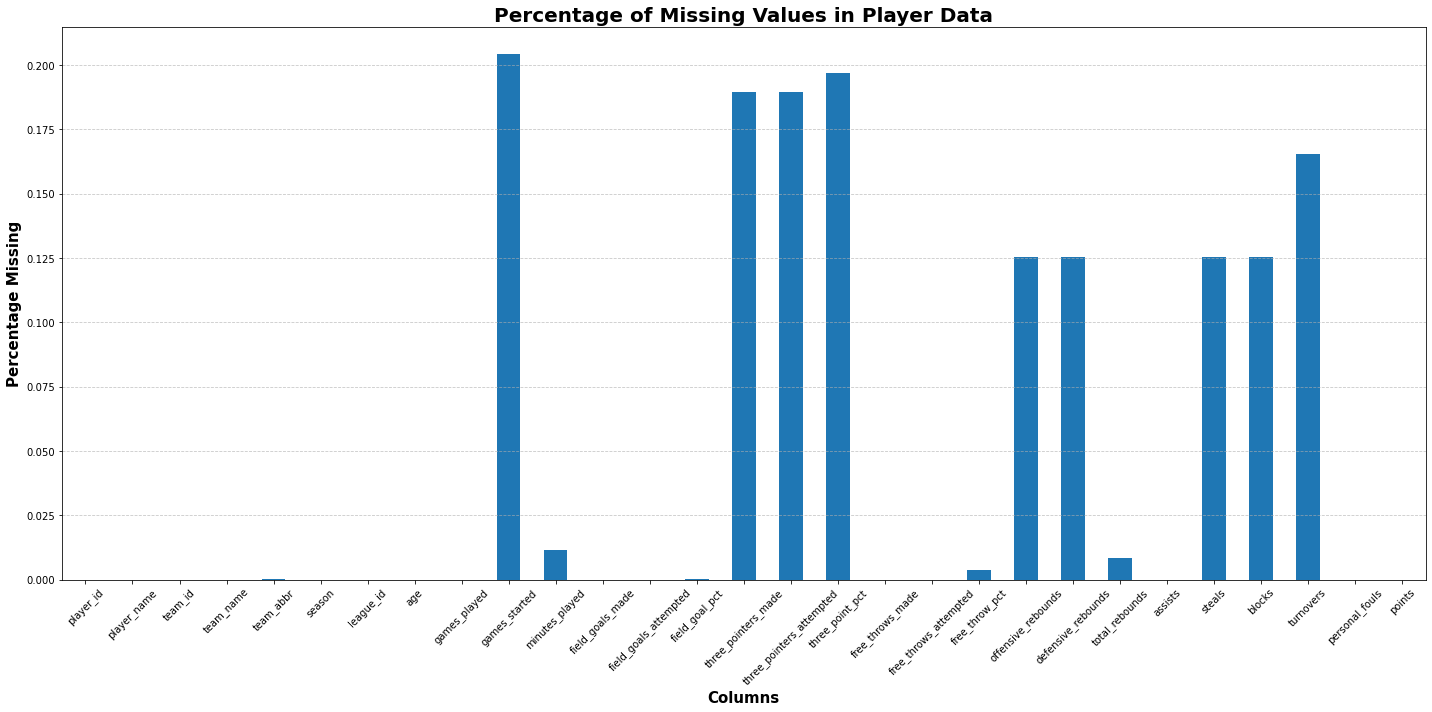

In [18]:
plt.figure(figsize=(20, 10)) 
plot = player_data_combined.isna().mean().plot(kind='bar')
plot.set_title('Percentage of Missing Values in Player Data', fontweight='bold', fontsize=20)
plot.set_xlabel('Columns', fontweight='bold', fontsize=15)
plot.set_ylabel('Percentage Missing', fontweight='bold', fontsize=15)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

As we can see there isnt a huge amount of missing values in total (highest is 20% for `games played`) and this shouldn't impact our analysis at all. However we can remove rows where all the main stats are missing (such as `field_goal_pct`, `three_pointers_made` etc). Lets look at how many of these rows exist :

In [19]:
missing_rows = player_data_combined[player_data_combined[['field_goal_pct', 'three_pointers_made', 'three_pointers_attempted', 'turnovers', 'blocks', 'steals']].isna().all(axis=1)]
num_missing_rows = len(missing_rows)

print(f'Number of rows where all specified columns have missing values: {num_missing_rows}')

Number of rows where all specified columns have missing values: 5


In [20]:
# removing these rows
player_data_combined = player_data_combined.dropna(subset=['field_goal_pct', 'three_pointers_made', 'three_pointers_attempted', 'turnovers', 'blocks', 'steals'], how='all')
player_data_combined

,player_id,player_name,team_id,team_name,team_abbr,season,league_id,age,games_played,games_started,...,free_throw_pct,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points
0,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1985-86,0,22.0,82,1.0,...,0.611,160.0,221.0,381.0,54,49.0,49.0,99.0,229,521
1,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1986-87,0,23.0,79,72.0,...,0.780,210.0,405.0,615.0,84,70.0,80.0,102.0,171,852
2,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1987-88,0,24.0,82,64.0,...,0.773,245.0,465.0,710.0,93,87.0,45.0,120.0,204,937
3,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1988-89,0,25.0,82,82.0,...,0.786,258.0,481.0,739.0,103,94.0,55.0,119.0,172,1088
4,920,A.C. Green,1610612747,Los Angeles Lakers,LAL,1989-90,0,26.0,82,82.0,...,0.751,262.0,450.0,712.0,90,66.0,50.0,116.0,207,1061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29870,980,Zydrunas Ilgauskas,1610612739,Cleveland Cavaliers,CLE,2008-09,0,34.0,65,65.0,...,0.799,157.0,333.0,490.0,64,28.0,84.0,90.0,183,838
29871,980,Zydrunas Ilgauskas,1610612739,Cleveland Cavaliers,CLE,2009-10,0,35.0,64,6.0,...,0.743,114.0,231.0,345.0,48,14.0,50.0,63.0,183,474
29872,980,Zydrunas Ilgauskas,1610612748,Miami Heat,MIA,2010-11,0,36.0,72,51.0,...,0.783,108.0,179.0,287.0,26,23.0,58.0,52.0,185,360
29873,1629597,Zylan Cheatham,1610612740,New Orleans Pelicans,NOP,2019-20,0,24.0,4,0.0,...,0.000,3.0,6.0,9.0,3,1.0,1.0,4.0,10,12


We have now removed all rows where the main stats are missing. Bare in mind, there are still many rows where values such as `three_pointers_made` are missing. However, the other values that are not missing in such rows can still be used in our analysis hence why we arent removing them. 

Lets save our updated dataset to a csv file :

In [60]:
output_dir = os.path.join("..", "data", "cleaned", "players_data")
os.makedirs(output_dir, exist_ok=True)

output_filename = os.path.join(output_dir, "player_stats.csv")
player_data_combined.to_csv(output_filename, index=False)

## Cleaning College Data

We'll now clean the college data which contains stats on every player that played for a specific college :

In [75]:
# merging into one dataframe
college_data_dir = "../data/raw/players_college_stats"


college_data_dfs = []


for filename in os.listdir(college_data_dir):
    if filename.endswith(".csv"):
        file_path = os.path.join(college_data_dir, filename)
        df = pd.read_csv(file_path)
        college_data_dfs.append(df)
        
college_data_combined = pd.concat(college_data_dfs, ignore_index=True)

In [76]:
college_data_combined.head(10)

,PLAYER_ID,PLAYER_NAME,COLLEGE,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,76984,Brian Heaney,Acadia (CAN),14,70.0,13,24,0.541666,NaN,NaN,...,0.500000,NaN,NaN,4.0,6,NaN,NaN,NaN,17,28
1,78385,Bill Turner,Akron,294,4060.0,603,1481,0.407157,NaN,NaN,...,0.728119,NaN,NaN,1039.0,167,NaN,NaN,NaN,605,1597
2,77684,Fred Nagy,Akron,50,NaN,94,271,0.346863,NaN,NaN,...,0.670103,NaN,NaN,NaN,68,NaN,NaN,NaN,84,253
3,76669,Ned Endress,Akron,16,NaN,3,25,0.120000,NaN,NaN,...,0.533333,NaN,NaN,NaN,4,NaN,NaN,NaN,13,14
4,202148,Mickell Gladness,Alabama A&M,26,252.0,25,59,0.423728,0.0,0.0,...,0.500000,14.0,44.0,58.0,5,4.0,20.0,7.0,32,56
5,77401,Kevin Loder,Alabama State,148,2094.0,365,791,0.461441,6.0,23.0,...,0.695000,113.0,225.0,338.0,174,67.0,43.0,143.0,261,875
6,202407,Elijah Millsap,Alabama-Birmingham,69,1120.0,93,284,0.327464,29.0,104.0,...,0.679245,37.0,154.0,191.0,78,63.0,19.0,78.0,159,287
7,101182,Donell Taylor,Alabama-Birmingham,98,834.0,109,276,0.394927,7.0,34.0,...,0.640625,30.0,76.0,106.0,90,47.0,7.0,59.0,81,266
8,1628,Alan Ogg,Alabama-Birmingham,80,657.0,75,152,0.493421,0.0,2.0,...,0.568181,48.0,85.0,133.0,13,12.0,58.0,30.0,132,175
9,1641998,Trey Jemison,Alabama-Birmingham,18,351.0,49,83,0.590361,0.0,0.0,...,0.823529,38.0,38.0,76.0,16,7.0,16.0,22.0,48,112


In [77]:
college_data_combined.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'COLLEGE', 'GP', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

We'll rename the column names just like we did for the player dataset :

In [78]:
column_name_mapping = {
    'PLAYER_ID': 'player_id',
    'PLAYER_NAME': 'player_name',
    'COLLEGE' : 'college',
    'GP': 'games_played',
    'GS': 'games_started',
    'MIN': 'minutes_played',
    'FGM': 'field_goals_made',
    'FGA': 'field_goals_attempted',
    'FG_PCT': 'field_goal_pct',
    'FG3M': 'three_pointers_made',
    'FG3A': 'three_pointers_attempted',
    'FG3_PCT': 'three_point_pct',
    'FTM': 'free_throws_made',
    'FTA': 'free_throws_attempted',
    'FT_PCT': 'free_throw_pct',
    'OREB': 'offensive_rebounds',
    'DREB': 'defensive_rebounds',
    'REB': 'total_rebounds',
    'AST': 'assists',
    'STL': 'steals',
    'BLK': 'blocks',
    'TOV': 'turnovers',
    'PF': 'personal_fouls',
    'PTS': 'points'
}

In [79]:
college_data_combined = college_data_combined.rename(columns=column_name_mapping)
college_data_combined.head(10)

,player_id,player_name,college,games_played,minutes_played,field_goals_made,field_goals_attempted,field_goal_pct,three_pointers_made,three_pointers_attempted,...,free_throw_pct,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points
0,76984,Brian Heaney,Acadia (CAN),14,70.0,13,24,0.541666,NaN,NaN,...,0.500000,NaN,NaN,4.0,6,NaN,NaN,NaN,17,28
1,78385,Bill Turner,Akron,294,4060.0,603,1481,0.407157,NaN,NaN,...,0.728119,NaN,NaN,1039.0,167,NaN,NaN,NaN,605,1597
2,77684,Fred Nagy,Akron,50,NaN,94,271,0.346863,NaN,NaN,...,0.670103,NaN,NaN,NaN,68,NaN,NaN,NaN,84,253
3,76669,Ned Endress,Akron,16,NaN,3,25,0.120000,NaN,NaN,...,0.533333,NaN,NaN,NaN,4,NaN,NaN,NaN,13,14
4,202148,Mickell Gladness,Alabama A&M,26,252.0,25,59,0.423728,0.0,0.0,...,0.500000,14.0,44.0,58.0,5,4.0,20.0,7.0,32,56
5,77401,Kevin Loder,Alabama State,148,2094.0,365,791,0.461441,6.0,23.0,...,0.695000,113.0,225.0,338.0,174,67.0,43.0,143.0,261,875
6,202407,Elijah Millsap,Alabama-Birmingham,69,1120.0,93,284,0.327464,29.0,104.0,...,0.679245,37.0,154.0,191.0,78,63.0,19.0,78.0,159,287
7,101182,Donell Taylor,Alabama-Birmingham,98,834.0,109,276,0.394927,7.0,34.0,...,0.640625,30.0,76.0,106.0,90,47.0,7.0,59.0,81,266
8,1628,Alan Ogg,Alabama-Birmingham,80,657.0,75,152,0.493421,0.0,2.0,...,0.568181,48.0,85.0,133.0,13,12.0,58.0,30.0,132,175
9,1641998,Trey Jemison,Alabama-Birmingham,18,351.0,49,83,0.590361,0.0,0.0,...,0.823529,38.0,38.0,76.0,16,7.0,16.0,22.0,48,112


In [80]:
college_data_combined.columns

Index(['player_id', 'player_name', 'college', 'games_played', 'minutes_played',
       'field_goals_made', 'field_goals_attempted', 'field_goal_pct',
       'three_pointers_made', 'three_pointers_attempted', 'three_point_pct',
       'free_throws_made', 'free_throws_attempted', 'free_throw_pct',
       'offensive_rebounds', 'defensive_rebounds', 'total_rebounds', 'assists',
       'steals', 'blocks', 'turnovers', 'personal_fouls', 'points'],
      dtype='object')

Lets now look at how many missing values exist in each column :

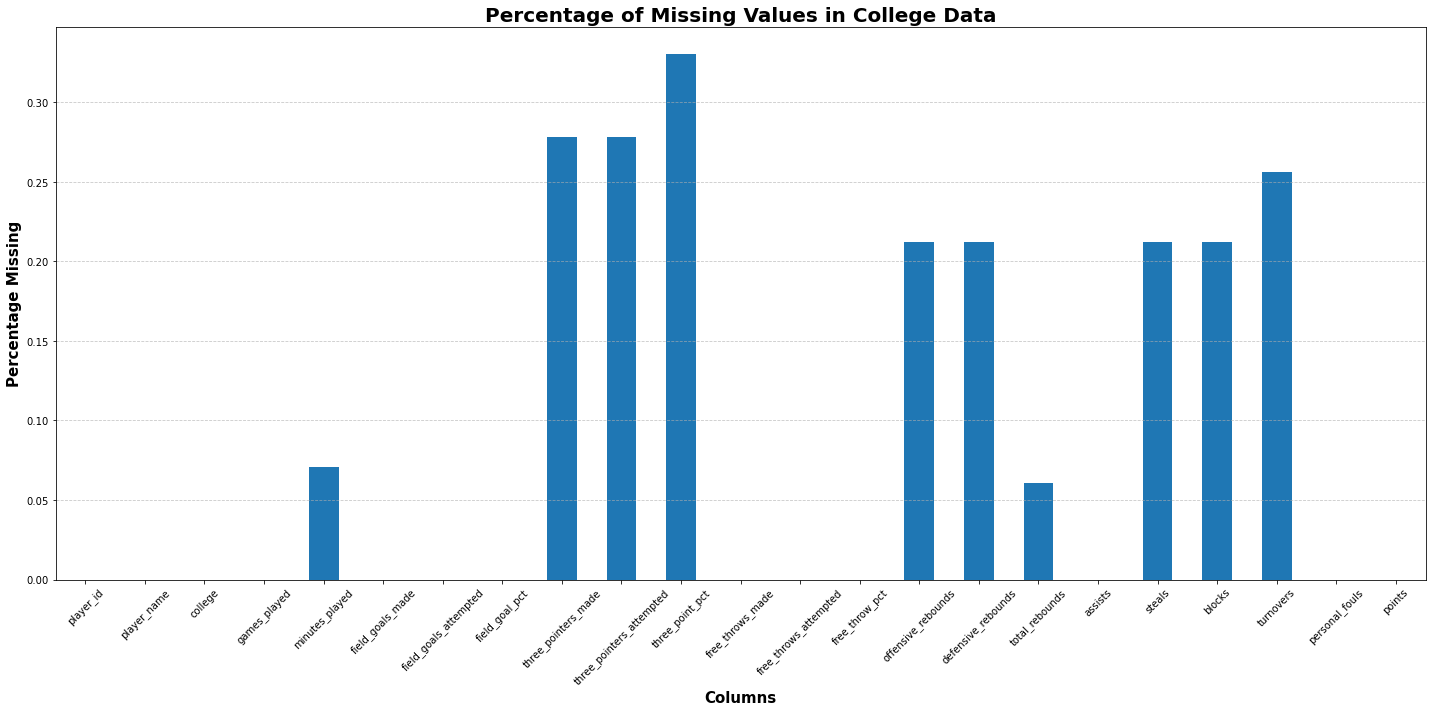

In [81]:
plt.figure(figsize=(20, 10)) 
plot = college_data_combined.isna().mean().plot(kind='bar')
plot.set_title('Percentage of Missing Values in College Data', fontweight='bold', fontsize=20)
plot.set_xlabel('Columns', fontweight='bold', fontsize=15)
plot.set_ylabel('Percentage Missing', fontweight='bold', fontsize=15)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Here again we see there's not too many missing values in any specific column. However, for the purpose of our analysis we'll remove rows that are missing important stats just like we did for the player dataset :

In [82]:
missing_rows = college_data_combined[college_data_combined[['field_goal_pct', 'three_pointers_made', 'three_pointers_attempted', 'turnovers', 'blocks', 'steals']].isna().all(axis=1)]
num_missing_rows = len(missing_rows)

print(f'Number of rows where all specified columns have missing values: {num_missing_rows}')

Number of rows where all specified columns have missing values: 0


As we can see there are no rows where all the important columns above have missing values so we can keep the dataset as is without making any further changes

Lets save this to a csv file :

In [84]:
output_dir = os.path.join("..", "data", "cleaned", "player_college_data")
os.makedirs(output_dir, exist_ok=True)

output_filename = os.path.join(output_dir, "player_college_stats.csv")
college_data_combined.to_csv(output_filename, index=False)